# Tasca dades, probabilitats i estadístiques

**Descripció**
Aprèn a realitzar estadístiques amb Python.

In [1]:
import pandas as pd
import numpy as np
import random
import statistics as st
import scipy 

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.simplefilter('ignore')

In [2]:
dtypes = {'position':'category', 'team':'category'}
mlb = pd.read_csv('../data-sources/mlbBat10.txt', sep='\t', dtype=dtypes)



In [3]:
mlb.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


## Nivell 1
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [4]:
atribut = 'AVG'

mlb[atribut].mode()

print(f"""Atribut: {atribut}
        moda: {mlb[atribut].mode()[0]:.3f}
        mediana: {mlb[atribut].median():.3f}
        mitjana: {mlb[atribut].mean():.3f}
        desviació std: {mlb[atribut].std():.3f}""")

Atribut: AVG
        moda: 0.000
        mediana: 0.195
        mitjana: 0.159
        desviació std: 0.145


#### amb value_counts

In [5]:
mlb[atribut].value_counts().head(1)

0.0    407
Name: AVG, dtype: int64

#### amb statistics

In [6]:
print(f"""Atribut: {atribut}
    moda: {st.mode(mlb[atribut]):.3f}
    mediana: {st.median(mlb[atribut]):.3f}
    mitjana: {st.mean(mlb[atribut]):.3f}
    desviació std: {st.stdev(mlb[atribut]):.3f}""")

Atribut: AVG
    moda: 0.000
    mediana: 0.195
    mitjana: 0.159
    desviació std: 0.145


In [7]:

print(f"""Atribut: {atribut}
    moda: {scipy.stats.mode(mlb[atribut])}
    mediana: {scipy.median(mlb[atribut]):.3f}
    mitjana: {scipy.mean(mlb[atribut]):.3f}
    desviació std: {scipy.std(mlb[atribut]):.3f}""")

Atribut: AVG
    moda: ModeResult(mode=array([0.]), count=array([407]))
    mediana: 0.195
    mitjana: 0.159
    desviació std: 0.145


### Exercici 2

Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

In [8]:
cols = ['OBP','SLG']

print('Pearson')
print(mlb[cols].corr())

print('\n\nKendall')
print(mlb[cols].corr(method='kendall'))

print('\n\nSpearman')
print(mlb[cols].corr(method='spearman'))



Pearson
          OBP       SLG
OBP  1.000000  0.814563
SLG  0.814563  1.000000


Kendall
          OBP       SLG
OBP  1.000000  0.773335
SLG  0.773335  1.000000


Spearman
          OBP       SLG
OBP  1.000000  0.897708
SLG  0.897708  1.000000


#### amb numpy

In [9]:
np.corrcoef(mlb.OBP,mlb.SLG.fillna(0.0))

array([[1.        , 0.81456281],
       [0.81456281, 1.        ]])

#### amb scipy

In [10]:
corr, pvalue = scipy.stats.pearsonr(mlb.OBP, mlb.SLG)
print(f"Pearson r: {corr}\t p-value: {pvalue}")
corr, pvalue = scipy.stats.kendalltau(mlb.OBP, mlb.SLG)
print(f"Kendall thau: {corr}\t p-value: {pvalue}")

corr, pvalue = scipy.stats.spearmanr(mlb.OBP, mlb.SLG)
print(f"Spearman rho: {corr}\t p-value: {pvalue}")


Pearson r: 0.8145628109369093	 p-value: 2.2006234200771987e-285
Kendall thau: 0.7733354009946855	 p-value: 7.986540744869569e-300
Spearman rho: 0.897707572011072	 p-value: 0.0


#### ho visualitzem

<AxesSubplot:xlabel='OBP', ylabel='SLG'>

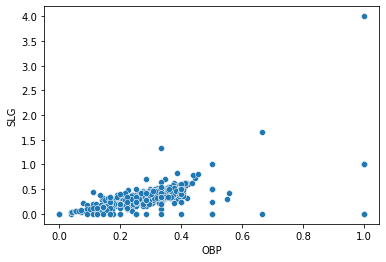

In [11]:
sns.scatterplot(data=mlb[cols],x='OBP',y='SLG')

## Nivell 2
### Exercici 3
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

Text(0.5, 1.0, 'Correlació')

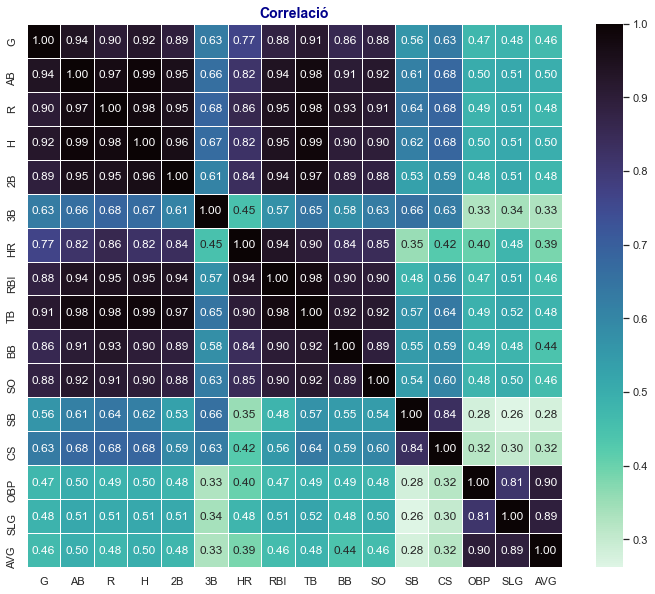

In [19]:
plt.figure(figsize=(12,10))
data = mlb.corr()
sns.heatmap(data, annot=True, fmt=".2f", linewidths=.5, cmap='mako_r')
plt.title('Correlació', fontdict={'fontsize':14, 'fontweight':'bold', 'color':'darkblue' })

Text(0.5, 1.0, 'Correlació')

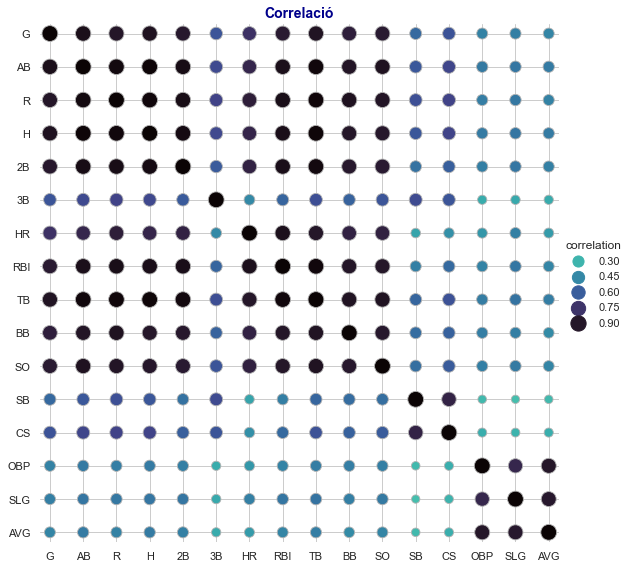

In [21]:
sns.set_theme(style="whitegrid")


# Compute a correlation matrix and convert to long-form
corr_mat = mlb.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="mako_r", hue_norm=(0, 1), edgecolor=".7",
    height=8, sizes=(5, 250), size_norm=(0., 1.),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
plt.title('Correlació', fontdict={'fontsize':14, 'fontweight':'bold','color':'darkblue' })

# for artist in g.legend.legendHandles:
#     artist.set_edgecolor(".7")

## Nivell 3
### Exercici 4
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

**Mitjana geomètrica:**

$$ \text{GM} = \sqrt[n\uproot 3 ]{x_1 \cdot x_2 \cdot x_3 \dots x_n} = \bigg( \prod_{i=1}^n x_i \bigg)^{\frac 1n}$$

$$\text{GM} = \exp \Bigg[ \frac{1}{n} \sum_{i=1}^n \ln {a_i} \Bigg]$$


**Mitjana harmònica:**
$$H = \frac {n}{\frac{1}{x_1} +\frac{1}{x_2} + \cdots + \frac{1}{x_n}}$$

In [14]:
def geom_mean(data):
    return np.exp(np.sum(np.log(data))/len(data))

geom_mean(mlb.G)

23.349599176875284

In [15]:
def harm_mean(data):
    return len(data)/np.sum(1/data)

harm_mean(mlb.G)

7.187464926137136

In [16]:
st.geometric_mean(mlb.G), st.harmonic_mean(mlb.G)

(23.349599176875284, 7.187464926137135)

#### Amb scipy

In [17]:
atribut = 'G'

print(f'''Atribut: {atribut}
    Mitjana aritmètica: {np.mean(mlb[atribut]):.4f} 
    Mitjana geomètrica: {scipy.stats.gmean(mlb[atribut]):.4f} 
    Mitjana harmònica: {scipy.stats.hmean(mlb[atribut]):.4f}''')

Atribut: G
    Mitjana aritmètica: 50.5346 
    Mitjana geomètrica: 23.3496 
    Mitjana harmònica: 7.1875
